# Pauta Laboratorio 2

## Algunas Variables Aleatorias Especiales
En este laboratorio revisaremos algunos tipos de variables aleatorias especiales, definidas por que tienen  distribuciones de probabilidad conocidas. Trabajaremos tanto con v.a. discretas como continuas, y calcularemos y graficaremos las probabilidades teóricas (probabilidaes puntutales, funciones de  densidad y de distribución de probabilidad) y luego las vamos a comparar con datos obtenidos por simulación.

### Estadísticos asociados
1. Posición:  tendencia central y no central
   percentiles, media, moda

2. Dispersión: 
    heterogeneidad, concentración 
    Varianza, desviación estándar

3. Forma: 
    asimetría, curtosis. 
    
   $$\text{ Asimetría (skewness) }= \frac{E[(X-\mu)^3]}{\sigma^3}$$
   $$\text{ Curtosis }= \frac{E[(X-\mu)^4]}{\sigma^4} - 3$$

In [57]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np
import scipy.stats as stats
import math

# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

matplotlib.rcParams['font.size'] = 18
matplotlib.rcParams['figure.dpi'] = 200

from IPython.core.pylabtools import figsize


#### Distribución Bernoulli
Suponga que se realiza un ensayo cuya salida es "éxito" o "falla". La v.a. entonces tiene sólo dos valores posibles: 1 si "éxito" 0 si no. Si $p$ es la probabilidad de éxito, entonces:

$\begin{equation}
\begin{array}{lll} 
P(X=1) & = &p \qquad y \qquad P(X=0) = 1-p \\
P(X = i) & = & p^i (1-p)^{1-i} \,, i=0,1\\
E[X] & = & 1*p + 0*p = p\\
E[X^2] & = & 1*p + 0*p = p\\
Var(X) & = & E[X^2] - (E[X])^2 = p - p^2 = p(1-p)\\
\end{array}
\end{equation}$


#### Distribución Binomial
Suponga que se realizan $N$  ensayos independientes idénticos  Bernoulli  de parámetro $p$. La v.a. X que representa el número $k$ de ensayos existosos entre los $N$ ensayos realizados, se denomina Binomial y cumple:

$\begin{equation}
\begin{array}{lll} 
P(X=k) & = & {N \choose k} p^k (1-p)^{N-k}, \qquad k=0,1,...N \\
E[X] & = & Np\\
Var(X) & = & Np(1-p)\\
Asimetria(X) & = & \frac{1-2p}{\sqrt{np(1-p)}}\\
Curtosis(X) & = & \frac{1-6p(1-p)}{np(1-p)}\\
\end{array}
\end{equation}$

### Simulación Variable Aleatoria con Distribución Binomial
En esta sección utilizaremos la función generadora de valores aleatorios para la distribución binomial, y se compara la distribución empírica con la distribución teórica

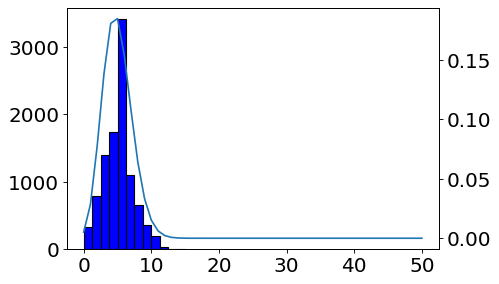

In [40]:
## simulación de size valores v.a. binomial
size=10000
n=50
p=0.1
datos_bin =stats.binom.rvs(n=n, p=p, size=size) 
binwidth = 4
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=80)
ax.hist(datos_bin, color = 'blue', edgecolor = 'black', bins = int(50/binwidth))
## probabilidad teórica
ax2 = ax.twinx()
vec = list(range(n+1))
##
pvec = []
for i in vec:
    pvec.append(stats.binom.pmf(k=i, n=n, p=p))
ax2.plot(vec,pvec)
plt.draw()


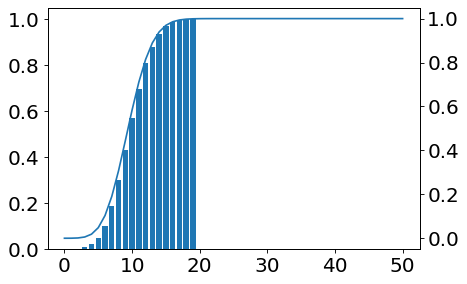

In [5]:
## gráfica de la distribución empírica acumulada
def ecdf(data):
    """ Calcula la distribución empírica acumulada"""
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

fig, ax = plt.subplots(1, 1,figsize=(6, 4), dpi=80)

x,cum_bin = ecdf(datos_bin)
ax.bar(x,cum_bin)
## probabilidad teórica
ax2 = ax.twinx()
vec = list(range(51))
##
pvec = []
for i in vec:
    pvec.append(stats.binom.cdf(k=i, n=n, p=p))
ax2.plot(vec,pvec)
plt.draw()


In [41]:
## Cálculo de esperanza y varianza empírica y teórica
promedio = sum(datos_bin)/size
var_emp = sum((datos_bin - promedio)*(datos_bin-promedio))/size
asim = stats.skew(datos_bin)
curtos = stats.kurtosis(datos_bin)
print('esperanza empírica:',promedio,' teórica: ',n*p)
print('varianza empírica:',var_emp,' teórica: ', n*p*(1-p))
print('asimetría empírica:', asim, 'teórica: ',(1-2*p)/(math.sqrt(n*p*(1-p))))
print('curtosis empírico: ', curtos, 'teórico: ',(1-6*p*(1-p))/(n*p*(1-p)))

esperanza empírica: 5.0186  teórica:  5.0
varianza empírica: 4.555254040000108  teórica:  4.5
asimetría empírica: 0.36839136191141514 teórica:  0.3771236166328254
curtosis empírico:  0.12806799441364092 teórico:  0.10222222222222219


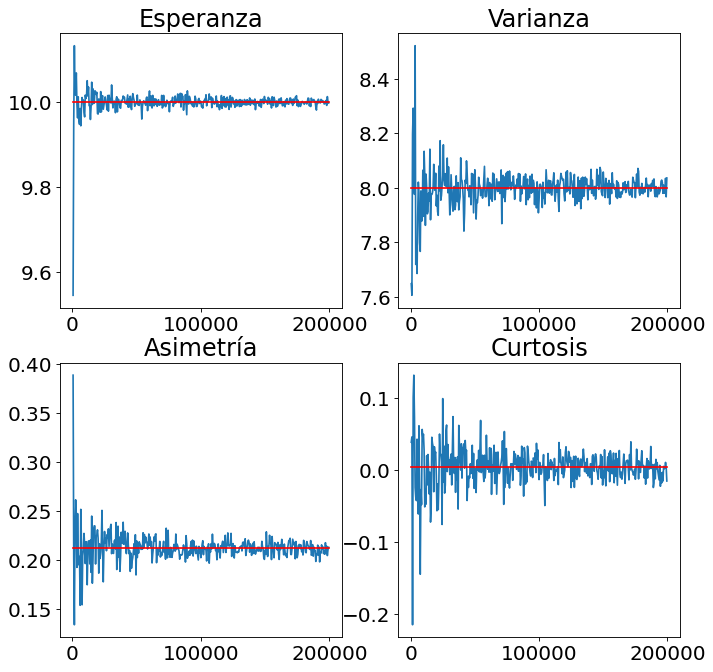

In [75]:
n=50
p=0.2
p_teo = n*p
var_teo = n*p*(1-p)
asim_teo = (1-2*p)/(math.sqrt(n*p*(1-p)))
curtos_teo = (1-6*p*(1-p))/(n*p*(1-p))
promedio = []
var_emp = []
asim = []
curtos = []
izq= 500
der = 200000
step = 500
vec = range(izq,der,step)
for size in vec:
    
    datos_bin =stats.binom.rvs(n=n, p=p, size=size)
    p_aux = sum(datos_bin)/size
    promedio.append(p_aux)
    var_emp.append(sum((datos_bin - p_aux)**2)/size)
    asim.append(stats.skew(datos_bin))
    curtos.append(stats.kurtosis(datos_bin))
    
fig, axs = plt.subplots(2, 2,figsize=(10, 10), dpi=80)
axs[0,0].set_title("Esperanza")
axs[0,0].plot(vec,promedio)
axs[0,0].plot((izq,der), (p_teo, p_teo), color='red')
axs[0,1].set_title("Varianza")
axs[0,1].plot(vec,var_emp)
axs[0,1].plot((izq,der), (var_teo, var_teo), color='red')
axs[1,0].set_title("Asimetría")
axs[1,0].plot(vec,asim)
axs[1,0].plot((izq,der), (asim_teo, asim_teo), color='red')
axs[1,1].set_title("Curtosis")
axs[1,1].plot(vec,curtos)
axs[1,1].plot((izq,der), (curtos_teo, curtos_teo), color='red')

#### Ejercicio 1: 
1) ¿Cuántas simulaciones es necesario hacer para acercarse a los valores teóricos?

2) Cambie los valores de los parámetros y analice si hay cambios en su respuesta en (1)

#### Respuestas
1) Todas las medidas se estabilizan sobre 10^5 simulaciones.  La que presenta el mayor error es la varianza

2) Cambiando el valor de n: 10, 100, 1000 no hay cambios mayores en las tasas de convergencia.  En el caso de p, al acercarse a valores extremos (0 o 1, menos aleatorio) mejoran las tasas de convergencia y empeoran al acercarse a 0.5 (mas aleatorio).

#### Ejercicio 2: 
Realice un desarrollo similar al caso de la Distribución Binomial para el caso de una variable aleatoria con Distribución de Probabilidad Poisson

In [3]:
## simulación de size valores v.a. poisson
size=1000000
mu = 5
n=30
datos_pois =stats.poisson.rvs(mu=mu, size=size) 
binwidth = 2
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=80)
ax.hist(datos_pois, color = 'blue', edgecolor = 'black', bins = int(n/binwidth))
## probabilidad teórica
ax2 = ax.twinx()
vec = list(range(n+1))
##
pvec = []
for i in vec:
    pvec.append(stats.poisson.pmf(k=i,mu=mu))
ax2.plot(vec,pvec)
plt.draw()

NameError: name 'stats' is not defined

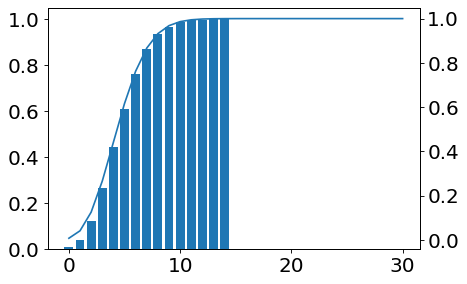

In [48]:
fig, ax = plt.subplots(1, 1,figsize=(6, 4), dpi=80)

x,cum_pois = ecdf(datos_pois)
ax.bar(x,cum_pois)
## probabilidad teórica
ax2 = ax.twinx()
vec = list(range(n+1))
##
pvec = []
for i in vec:
    pvec.append(stats.poisson.cdf(k=i, mu=mu))
ax2.plot(vec,pvec)
plt.draw()


In [54]:
## Cálculo de esperanza y varianza empírica y teórica
promedio = sum(datos_pois)/size
var_emp = sum((datos_pois - promedio)*(datos_pois-promedio))/size
asim = stats.skew(datos_pois)
curtos = stats.kurtosis(datos_pois)
print('esperanza empírica:',promedio,' teórica: ',mu)
print('varianza empírica:',var_emp,' teórica: ', mu)
print('asimetría empírica:', asim, 'teórica: ',1/math.sqrt(mu))
print('curtosis empírico: ', curtos, 'teórico: ',(1/mu))

esperanza empírica: 5.000555  teórica:  5
varianza empírica: 5.010688691959243  teórica:  5
asimetría empírica: 0.44989530345883383 teórica:  0.4472135954999579
curtosis empírico:  0.19916205107689366 teórico:  0.2


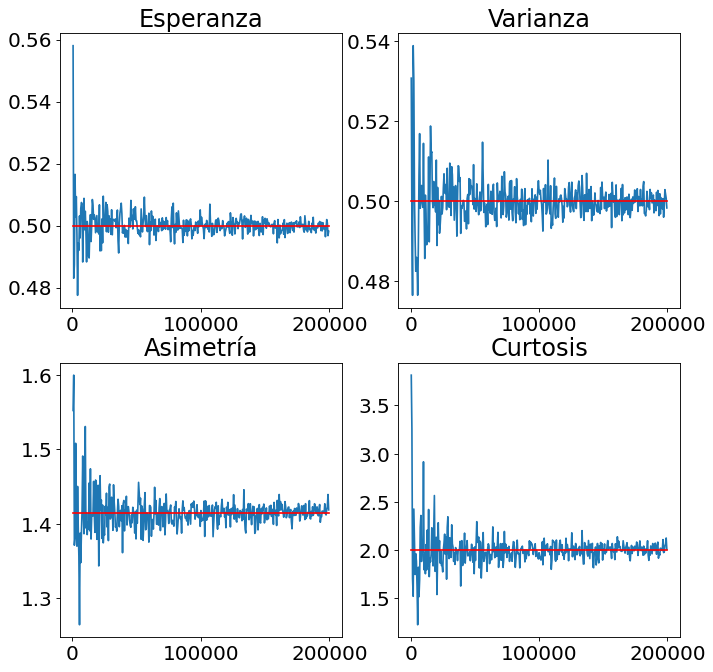

In [78]:
mu=0.50
p_teo = mu
var_teo = mu
asim_teo = 1/math.sqrt(mu)
curtos_teo = 1/mu
promedio = []
var_emp = []
asim = []
curtos = []
izq= 500
der = 200000
step = 500
vec = range(izq,der,step)
for size in vec:
    
    datos_pois =stats.poisson.rvs(mu=mu, size=size)
    p_aux = sum(datos_pois)/size
    promedio.append(p_aux)
    var_emp.append(sum((datos_pois - p_aux)**2)/size)
    asim.append(stats.skew(datos_pois))
    curtos.append(stats.kurtosis(datos_pois))
    
fig, axs = plt.subplots(2, 2,figsize=(10, 10), dpi=80)
axs[0,0].set_title("Esperanza")
axs[0,0].plot(vec,promedio)
axs[0,0].plot((izq,der), (p_teo, p_teo), color='red')
axs[0,1].set_title("Varianza")
axs[0,1].plot(vec,var_emp)
axs[0,1].plot((izq,der), (var_teo, var_teo), color='red')
axs[1,0].set_title("Asimetría")
axs[1,0].plot(vec,asim)
axs[1,0].plot((izq,der), (asim_teo, asim_teo), color='red')
axs[1,1].set_title("Curtosis")
axs[1,1].plot(vec,curtos)
axs[1,1].plot((izq,der), (curtos_teo, curtos_teo), color='red')

El comportamiento de la convergencia es similar. Si aumenta el factor de escala mu, la aproximación de la varianza es menos exacta y si disminuye mejora.

#### Distribución Normal o Gaussiana
Sea $X$ v.a. continua, es normal de media $\mu$ y varianza $\sigma^2$ y se denota $\cal{N}(\mu,\sigma^2)$ si su densidad de probabilidad cumple:


$\begin{equation}
\begin{array}{lll} 
f_X(x) & = & \frac{1}{\sqrt{2\pi}\sigma} exp(\frac{-(x-\mu)^2}{2\sigma^2})\qquad, -\infty < x <\infty\\
E[X] &= &\mu\\
Var(X)& =& \sigma^2\\
\end{array}
\end{equation}$

Esta es la distribución de probabilidad mas utilizada. Muchas variables se distribuyen aproximadamente normales (altura, peso, satisfacción en el trabajo, etc.). 

Permite modelar los errores o ruidos.

¿Cómo se verifica que una v.a. sigue una distribución normal?

Test de normalidad de Shapiro-Wilk, Q-Q plot


### Simulación Variable Aleatoria con Distribución Normal
En esta sección utilizaremos la función generabdora de valores aleatorios para la distribución normal, y se compara la distribución empírica con la distribución teórica

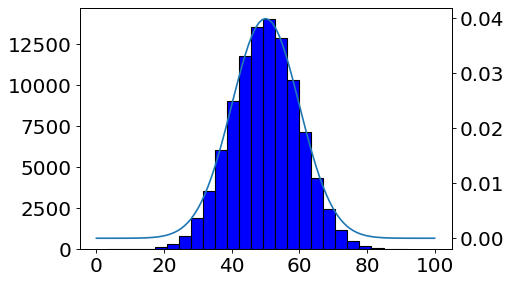

In [82]:
## simulación de size valores v.a. normal
size=100000
mu=50
sigma=10
datos_norm =stats.norm.rvs(loc=mu, scale= sigma, size=size) 
binwidth = 4
fig, ax = plt.subplots(1, 1,figsize=(6, 4), dpi=80)
ax.hist(datos_norm, color = 'blue', edgecolor = 'black', bins = int(2*mu/binwidth))
## probabilidad teórica
ax2 = ax.twinx()
vec = list(range(2*mu+1))
##
pvec = []
for i in vec:
    pvec.append(stats.norm.pdf(x=i, loc=mu, scale= sigma))
ax2.plot(vec,pvec)
plt.draw()


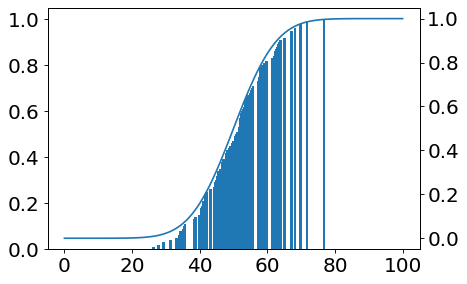

In [17]:
## gráfica de la distribución empírica acumulada
def ecdf(data):
    """ Calcula la distribución empírica acumulada"""
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

fig, ax = plt.subplots(1, 1,figsize=(6, 4), dpi=80)

x,cum_norm = ecdf(datos_norm)
ax.bar(x,cum_norm)
## probabilidad teórica
ax2 = ax.twinx()
vec = list(range(2*mu+1))
##
pvec = []
for i in vec:
    pvec.append(stats.norm.cdf(x=i, loc=mu, scale=sigma))
ax2.plot(vec,pvec)
plt.draw()


In [83]:
## Cálculo de esperanza y varianza empírica y teórica
promedio = sum(datos_norm)/size
var_emp = sum((datos_norm - promedio)*(datos_norm-promedio))/size
asim = stats.skew(datos_norm)
curtos = stats.kurtosis(datos_norm)
print('esperanza empírica:',promedio,' teórica: ',mu, 'error porcentual', (promedio-mu)/mu*100)
print('varianza empírica:',var_emp,' teórica: ', sigma*sigma, 'error porcentual', (var_emp-sigma**2)/(sigma**2)*100)
print('asimetría empírica:', asim, 'teórica: ',0)
print('curtosis empírico: ', curtos, 'teórico: ',0)


esperanza empírica: 50.007337629977464  teórica:  50 error porcentual 0.014675259954927355
varianza empírica: 99.75302770718321  teórica:  100 error porcentual -0.24697229281679256
asimetría empírica: -0.010850211009882179 teórica:  0
curtosis empírico:  8.899474857937406e-05 teórico:  0


#### Ejercicio 3: 
1) ¿Cuántas simulaciones es necesario hacer para acercarse a los valores teóricos?

2) Cambie los valores de los parámetros y analice si hay cambios en su respuesta en (1)


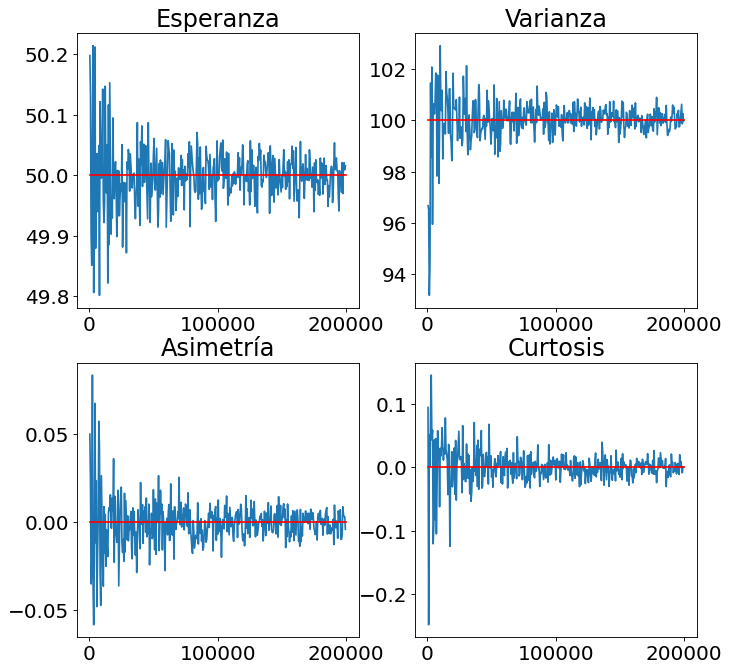

In [88]:
mu=50
sigma = 10
p_teo = mu
var_teo = sigma**2
asim_teo = 0
curtos_teo = 0
promedio = []
var_emp = []
asim = []
curtos = []
izq= 500
der = 200000
step = 500
vec = range(izq,der,step)
for size in vec:
    
    datos_norm =stats.norm.rvs(loc=mu,scale=sigma,size=size)
    p_aux = sum(datos_norm)/size
    promedio.append(p_aux)
    var_emp.append(sum((datos_norm - p_aux)**2)/size)
    asim.append(stats.skew(datos_norm))
    curtos.append(stats.kurtosis(datos_norm))
    
fig, axs = plt.subplots(2, 2,figsize=(10, 10), dpi=80)
axs[0,0].set_title("Esperanza")
axs[0,0].plot(vec,promedio)
axs[0,0].plot((izq,der), (p_teo, p_teo), color='red')
axs[0,1].set_title("Varianza")
axs[0,1].plot(vec,var_emp)
axs[0,1].plot((izq,der), (var_teo, var_teo), color='red')
axs[1,0].set_title("Asimetría")
axs[1,0].plot(vec,asim)
axs[1,0].plot((izq,der), (asim_teo, asim_teo), color='red')
axs[1,1].set_title("Curtosis")
axs[1,1].plot(vec,curtos)
axs[1,1].plot((izq,der), (curtos_teo, curtos_teo), color='red')

#### Respuesta: 
1. Se obtiene una buena aproximación  partir de 10^5 simulaciones, con un errores porcentuales menores al 0.1% en el caso de la media y 0.25%  en el caso de la varianza y errores absolutos inferiores a 0.05 en asimetría y kurtosis. 
2. Al aumentar el valor de la varianza, se requieren mas simulaciones para alcanzar la misma precisión. Inversamente, para valores de  varianza menor, se requieren menos simulaciones para aproximar bien los valores teóricos. El valor el parámetro de localización no influye en la tasa de convergencia.

#### Ejercicio 4: 
Realice un desarrollo similar para el caso de una variable aleatoria continua distribuída exponencial de tasa $\lambda$

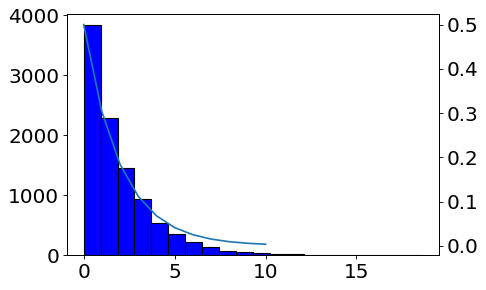

In [77]:
## simulación de size valores v.a. exponencial
size=10000
s = 2
datos_exp =stats.expon.rvs(scale= s, loc=0, size=size) 
binwidth = 0.5
fig, ax = plt.subplots(1, 1,figsize=(6, 4), dpi=80)
ax.hist(datos_exp, color = 'blue', edgecolor = 'black', bins = int(s*5/binwidth))
## probabilidad teórica
ax2 = ax.twinx()
vec = list(range(s*5+1))
##
pvec = []
for i in vec:
    pvec.append(stats.expon.pdf(x=i, loc=0, scale= s))
ax2.plot(vec,pvec)
plt.draw()

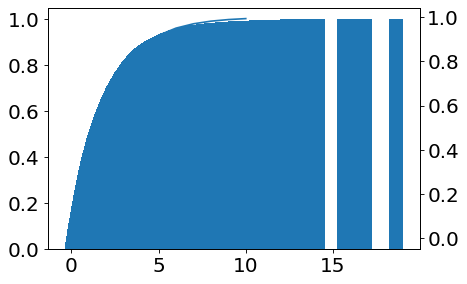

In [78]:
fig, ax = plt.subplots(1, 1,figsize=(6, 4), dpi=80)

x,cum_exp = ecdf(datos_exp)
ax.bar(x,cum_exp)
## probabilidad teórica
ax2 = ax.twinx()
vec = list(range(5*s+1))
##
pvec = []
for i in vec:
    pvec.append(stats.expon.cdf(x=i, loc=0, scale=s))
ax2.plot(vec,pvec)
plt.draw()


In [81]:
## Cálculo de esperanza y varianza empírica y teórica
promedio = sum(datos_exp)/size
var_emp = sum((datos_exp- promedio)*(datos_exp-promedio))/size
asim = stats.skew(datos_exp)
curtos = stats.kurtosis(datos_exp)
print('esperanza empírica:',promedio,' teórica: ',s)
print('varianza empírica:',var_emp,' teórica: ', (s*s))
print('asimetría empírica:', asim, 'teórica: ',2)
print('curtosis empírico: ', curtos, 'teórico: ',6)


esperanza empírica: 1.9663017723958462  teórica:  2
varianza empírica: 3.993225928421212  teórica:  4
asimetría empírica: 2.041004633742116 teórica:  2
curtosis empírico:  5.937529635028383 teórico:  6


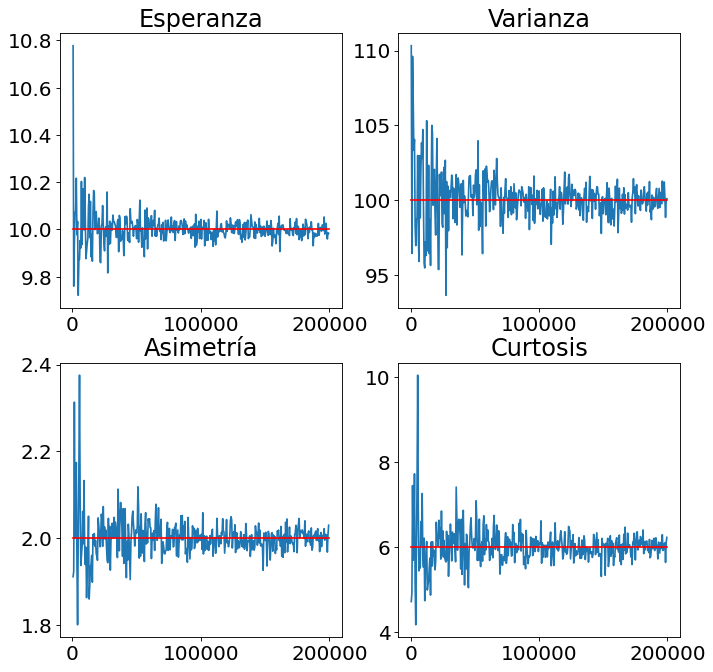

In [90]:

s= 10
p_teo = s
var_teo = s**2
asim_teo = 2
curtos_teo = 6
promedio = []
var_emp = []
asim = []
curtos = []
izq= 500
der = 200000
step = 500
vec = range(izq,der,step)
for size in vec:
    
    datos_exp =stats.expon.rvs(scale=s,size=size)
    p_aux = sum(datos_exp)/size
    promedio.append(p_aux)
    var_emp.append(sum((datos_exp - p_aux)**2)/size)
    asim.append(stats.skew(datos_exp))
    curtos.append(stats.kurtosis(datos_exp))
    
fig, axs = plt.subplots(2, 2,figsize=(10, 10), dpi=80)
axs[0,0].set_title("Esperanza")
axs[0,0].plot(vec,promedio)
axs[0,0].plot((izq,der), (p_teo, p_teo), color='red')
axs[0,1].set_title("Varianza")
axs[0,1].plot(vec,var_emp)
axs[0,1].plot((izq,der), (var_teo, var_teo), color='red')
axs[1,0].set_title("Asimetría")
axs[1,0].plot(vec,asim)
axs[1,0].plot((izq,der), (asim_teo, asim_teo), color='red')
axs[1,1].set_title("Curtosis")
axs[1,1].plot(vec,curtos)
axs[1,1].plot((izq,der), (curtos_teo, curtos_teo), color='red')

Se aprecia convergencia a partir de 10^5 simulaciones

#### Ejercicio 5: 
Utilice datos de clima de Valdivia, escoja un parámetro diario(temperatura promedio, mínima o máxima, agua caída, etc) y grafique el histograma de un año completo y luego separe por estación del año y grafique 4 histogramas.  Compare y concluya.

In [54]:
## analizaremos temperatura máxima
datos = pd.read_csv('2019_Temperatura.csv',sep=";")
datos.head()


,CodigoNacional,momento,Ts_Valor
0,390006,01/01/2019 0:00,14.6
1,390006,01/01/2019 1:00,14.3
2,390006,01/01/2019 2:00,14.1
3,390006,01/01/2019 3:00,13.7
4,390006,01/01/2019 4:00,13.6


In [50]:
temp = np.array(datos['Ts_Valor'])
temp1= temp.reshape(365,24)
print(temp1)
tempMax=[]
for i in range(365):
    tempMax.append(max(temp1[i]))




[[14.6 14.3 14.1 ... 17.6 16.6 15.3]
 [13.4 12.9 12.5 ... 18.5 18.9 17.5]
 [15.6 12.9 11.5 ... 21.5 20.6 20.2]
 ...
 [18.3 16.3 11.4 ... 23.6 22.5 20.3]
 [17.3 12.7 11.2 ... 24.8 23.8 23.1]
 [20.1 18.1 16.7 ... 27.5 26.1 24.1]]


(array([ 3.,  4.,  3.,  7., 10., 17., 16., 29., 29., 21., 27., 27., 12.,
         8., 15., 21., 12., 15., 20.,  8.,  7., 11., 12.,  6.,  7.,  3.,
         2.,  0.,  1.,  1.,  0.,  0.,  2.,  1.,  0.,  1.]),
 array([ 5.8       ,  6.68888889,  7.57777778,  8.46666667,  9.35555556,
        10.24444444, 11.13333333, 12.02222222, 12.91111111, 13.8       ,
        14.68888889, 15.57777778, 16.46666667, 17.35555556, 18.24444444,
        19.13333333, 20.02222222, 20.91111111, 21.8       , 22.68888889,
        23.57777778, 24.46666667, 25.35555556, 26.24444444, 27.13333333,
        28.02222222, 28.91111111, 29.8       , 30.68888889, 31.57777778,
        32.46666667, 33.35555556, 34.24444444, 35.13333333, 36.02222222,
        36.91111111, 37.8       ]),
 <BarContainer object of 36 artists>)

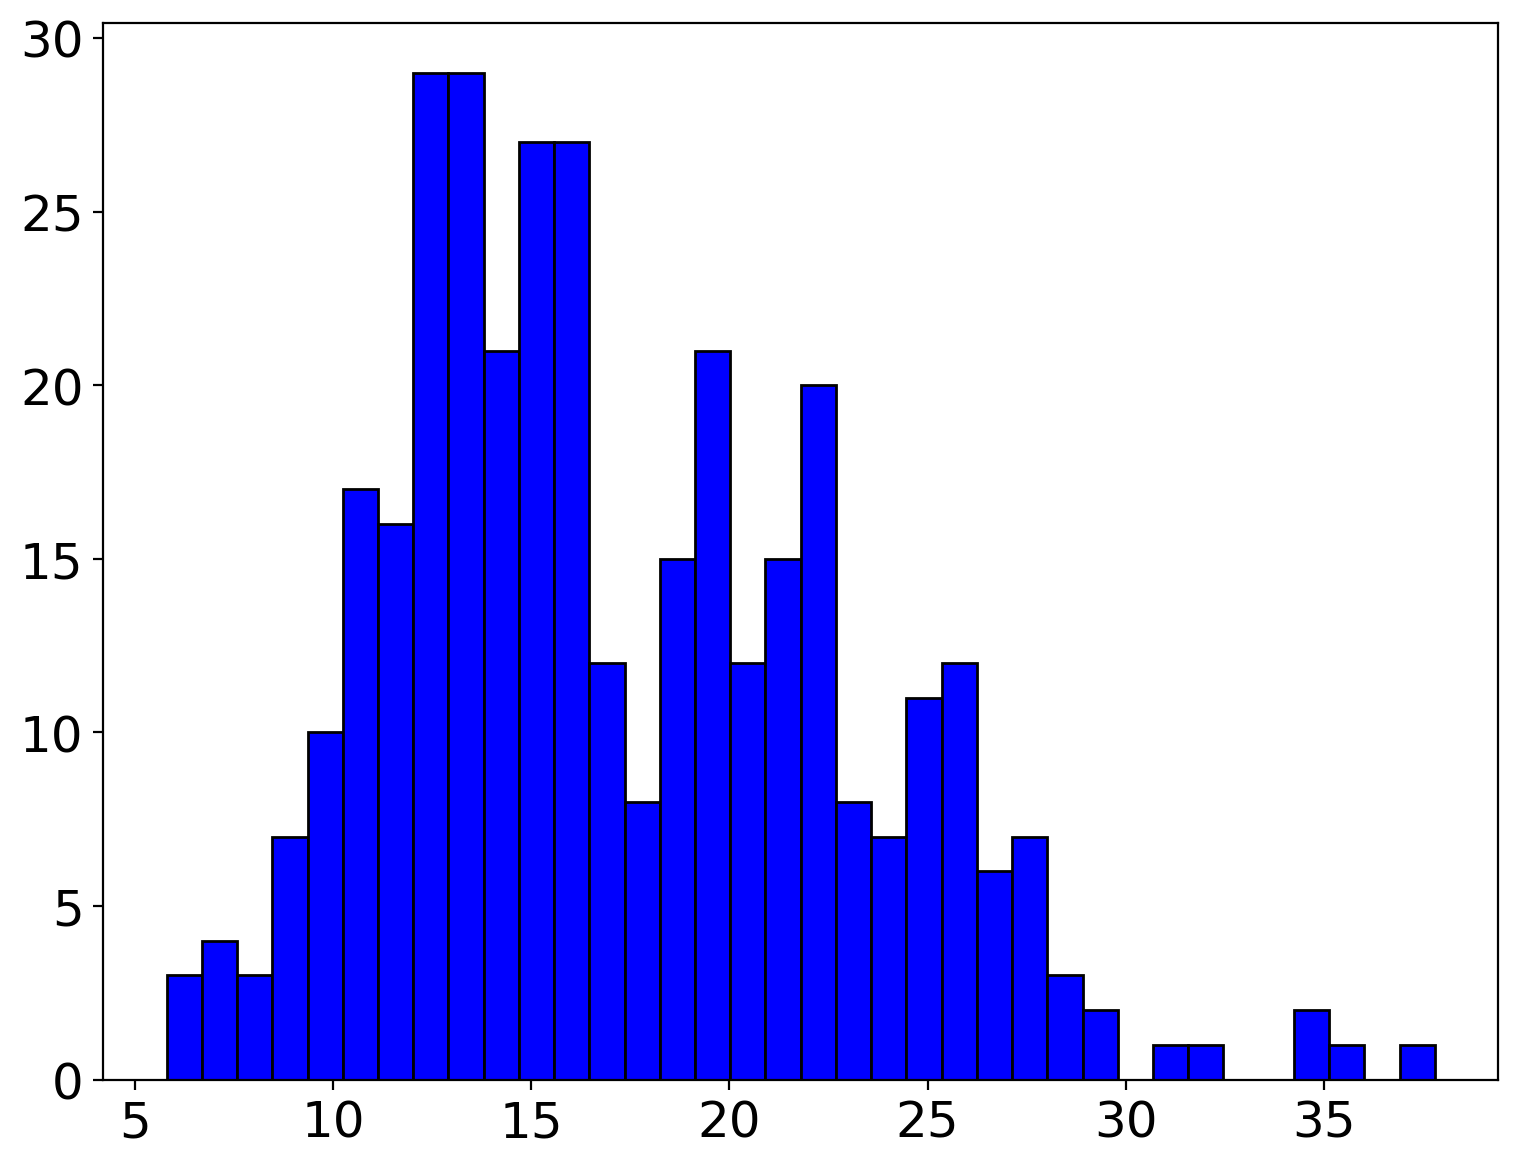

In [51]:
figsize(9, 7)

# Hacer histograma usando matplotlib, los bins deben ser enteros

plt.hist(tempMax, color = 'blue', edgecolor = 'black',
         bins = int(180/5))

Se observan dos regiones mas frecuentes, en torno 15 grados y otra en torno a 22 grados, que seguramente corresponden a las distintas estaciones del año. También se observan algunos valores extremos, correspondientes al verano seguramente.

(array([ 1.,  4.,  3., 14., 10.,  5., 13., 11., 11.,  7.,  5.,  3.]),
 array([ 9.2       , 10.68333333, 12.16666667, 13.65      , 15.13333333,
        16.61666667, 18.1       , 19.58333333, 21.06666667, 22.55      ,
        24.03333333, 25.51666667, 27.        ]),
 <BarContainer object of 12 artists>)

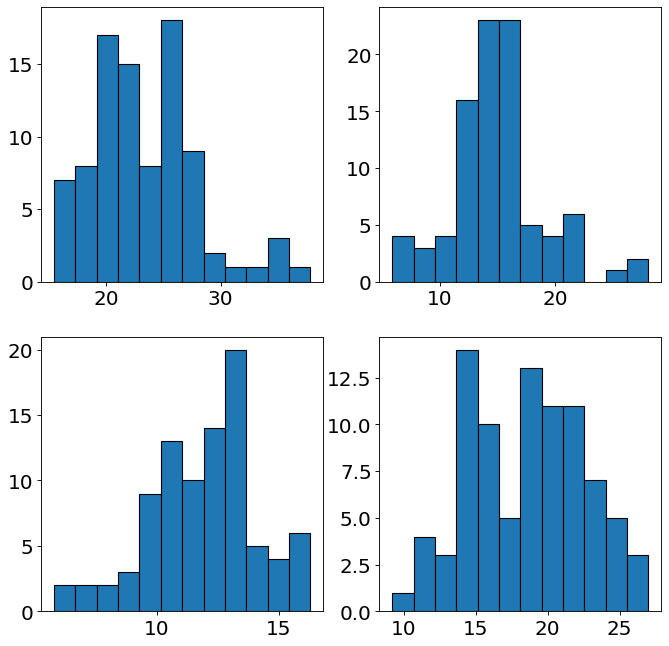

In [52]:
MaxVerano = tempMax[0:80]
MaxVerano += tempMax[355:366]
MaxOtoño = tempMax[80:171]
MaxInvierno = tempMax[171:262]
MaxPrimavera = tempMax[262:355]
fig, axs = plt.subplots(2, 2,figsize=(10, 10), dpi=80)

axs[0,0].hist(MaxVerano, edgecolor = 'black',
         bins = int(60/5))
axs[0,1].hist(MaxOtoño, edgecolor = 'black',
         bins = int(60/5))
axs[1,0].hist(MaxInvierno, edgecolor = 'black',
         bins = int(60/5))
axs[1,1].hist(MaxPrimavera, edgecolor = 'black',
         bins = int(60/5))


Se puede observar que los histogramas por estación están centrados en distintos valores de temperatura máxima. En el caso del verano, el histograma contiene algunos valores extremos y dos valores mas frecuentes (20 y 26). Los histogramas de otoño e invierno son similares, levemente asimétricos hacia la derecha. El histograma de la primavera, tiene dos valores mas frecuentes (19 y 15), al igual que en verano, pero no registra valores extremos

### Referencias

https://github.com/WillKoehrsen/Data-Analysis/blob/master/univariate_dist/Histogram%20and%20Density%20Plot.ipynb

Datos de clima:https://climatologia.meteochile.gob.cl/application/historicos/datosDescarga/390006